In [55]:
#data-set fictional characterstic complex.csv

# Step 1: Import Necessary Libraries
import pandas as pd
import numpy as np

# Upload the dataset to Google Colab
from google.colab import files
uploaded = files.upload()

# Assuming your file is a CSV, load it into a Pandas DataFrame
filename = next(iter(uploaded))
df = pd.read_csv(filename)

# View the first few rows of the dataset to understand its structure
print(df.head())
print(df.info())


Saving fictional_character_battles_complex.csv to fictional_character_battles_complex (2).csv
      Character   Universe  Strength  Speed  Intelligence SpecialAbilities  \
0  Wonder Woman     Marvel         7      8             3      Telekinesis   
1      Iron Man     Marvel         4      7             9      Telekinesis   
2      Iron Man  DC Comics         8      7             5      Telekinesis   
3    Spider-Man  DC Comics         5      6            10      Telekinesis   
4         Flash     Marvel         7      6             2     Invisibility   

   Weaknesses  BattleOutcome  
0  Kryptonite              0  
1  Kryptonite              0  
2       Magic              0  
3  Kryptonite              0  
4       Magic              0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Character         2351 non-null   object
 1   Un

In [56]:
# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Check data types of each column
print(df.dtypes)


          Strength        Speed  Intelligence  BattleOutcome
count  2351.000000  2351.000000   2351.000000    2351.000000
mean      5.442790     5.484900      5.550829       0.279030
std       2.897105     2.858895      2.863540       0.448618
min       1.000000     1.000000      1.000000       0.000000
25%       3.000000     3.000000      3.000000       0.000000
50%       5.000000     6.000000      6.000000       0.000000
75%       8.000000     8.000000      8.000000       1.000000
max      10.000000    10.000000     10.000000       1.000000
Character           0
Universe            0
Strength            0
Speed               0
Intelligence        0
SpecialAbilities    0
Weaknesses          0
BattleOutcome       0
dtype: int64
Character           object
Universe            object
Strength             int64
Speed                int64
Intelligence         int64
SpecialAbilities    object
Weaknesses          object
BattleOutcome        int64
dtype: object


In [57]:
# Step 3: Handling Missing Values
# Iterate through each column in the DataFrame and handle missing values appropriately
for column in df.columns:
    if df[column].dtype == 'object':  # For categorical columns
        df[column] = df[column].fillna(df[column].mode()[0])  # Fill with mode
    else:  # For numerical columns
        df[column] = df[column].fillna(df[column].median())  # Fill with median

# Check if the data is clean now
print(df.head())
print(df.info())


      Character   Universe  Strength  Speed  Intelligence SpecialAbilities  \
0  Wonder Woman     Marvel         7      8             3      Telekinesis   
1      Iron Man     Marvel         4      7             9      Telekinesis   
2      Iron Man  DC Comics         8      7             5      Telekinesis   
3    Spider-Man  DC Comics         5      6            10      Telekinesis   
4         Flash     Marvel         7      6             2     Invisibility   

   Weaknesses  BattleOutcome  
0  Kryptonite              0  
1  Kryptonite              0  
2       Magic              0  
3  Kryptonite              0  
4       Magic              0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Character         2351 non-null   object
 1   Universe          2351 non-null   object
 2   Strength          2351 non-null   int64 
 3   Spee

BattleOutcome
0    1695
1     656
Name: count, dtype: int64


<ipython-input-58-987969dfeed3>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Universe', y='Speed', data=df, palette='muted')


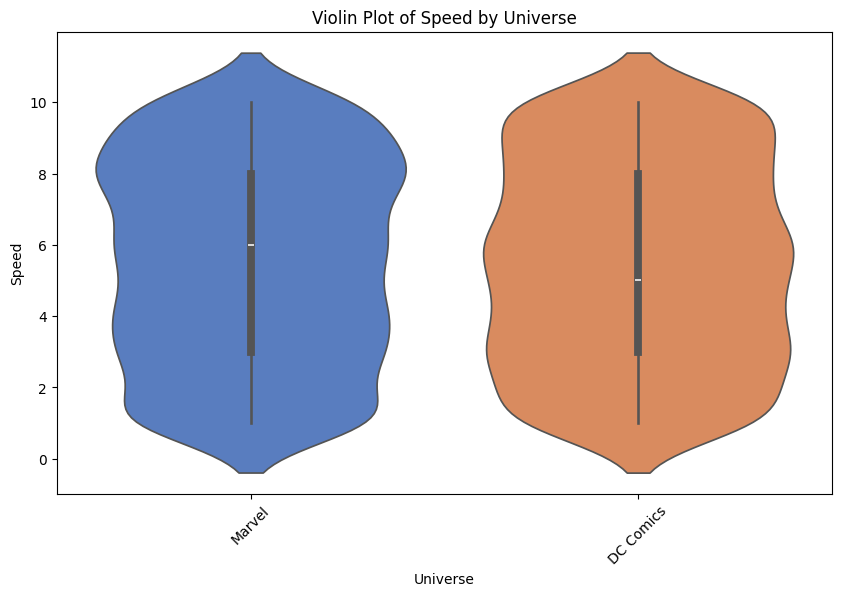

In [58]:
# Step 4: Define Features and Target
# Replace 'BattleOutcome' with the actual column name that represents the outcome
X = df.drop(columns=['BattleOutcome'])  # Features (all columns except the target)
y = df['BattleOutcome']  # Target variable (Win/Loss)

# Check the distribution of the target variable to see if there is any imbalance
print(y.value_counts())

# Plot 3: Violin Plot for 'Speed' by 'Universe'
plt.figure(figsize=(10, 6))
sns.violinplot(x='Universe', y='Speed', data=df, palette='muted')
plt.title('Violin Plot of Speed by Universe')
plt.xlabel('Universe')
plt.ylabel('Speed')
plt.xticks(rotation=45)
plt.show()


A violin plot is a way to show the distribution of a numeric feature (like Speed) for different categories (like Universe). It helps you visualize not just the range and median, but also the density—how spread out the data is and where the data concentrates   If the Marvel violin is wider in the lower speed range, that means a lot of Marvel characters have relatively low speed.
If the DC violin is wider in the upper speed range, that means many DC characters are generally faster.
The violin plot is a great tool to quickly see the overall speed comparison between different universes, including the average speed, spread, and the concentration of character speeds.

In [59]:
from sklearn.model_selection import train_test_split

# Step 5: Split the Data into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and test sets
print(f"Training Set: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Test Set: X_test: {X_test.shape}, y_test: {y_test.shape}")


Training Set: X_train: (1880, 7), y_train: (1880,)
Test Set: X_test: (471, 7), y_test: (471,)


   Strength  Speed  Intelligence  BattleOutcome  Character_Captain America  \
0         7      8             3              0                      False   
1         4      7             9              0                      False   
2         8      7             5              0                      False   
3         5      6            10              0                      False   
4         7      6             2              0                      False   

   Character_Flash  Character_Iron Man  Character_Spider-Man  \
0            False               False                 False   
1            False                True                 False   
2            False                True                 False   
3            False               False                  True   
4             True               False                 False   

   Character_Superman  Character_Thor  Character_Wonder Woman  \
0               False           False                    True   
1               

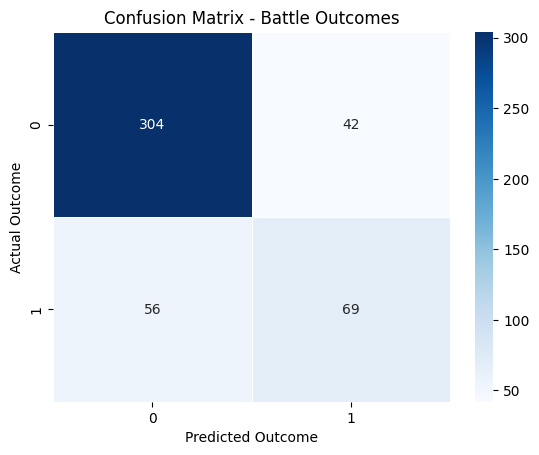

In [60]:
# Step 3: Convert Categorical Variables
# Apply One-Hot Encoding to convert categorical variables into numerical form
# This step should be applied after handling missing values
df = pd.get_dummies(df, drop_first=True)

# Check if all features are now numeric
print(df.head())
print(df.info())

# Step 4: Define Features and Target
# Replace 'BattleOutcome' with the actual column name that represents the outcome
X = df.drop(columns=['BattleOutcome'])  # Features (all columns except the target)
y = df['BattleOutcome']  # Target variable (Win/Loss)

# Step 5: Split the Data into Training and Test Sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and test sets
print(f"Training Set: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Test Set: X_test: {X_test.shape}, y_test: {y_test.shape}")

# Step 6: Feature Scaling
# Apply StandardScaler to scale the features in training and test sets
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit the scaler on the training set and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Use the fitted scaler to transform the test set
X_test_scaled = scaler.transform(X_test)

# Print the shapes of the scaled features to verify they match the target variable shape
print(f"Scaled Training Set: X_train_scaled: {X_train_scaled.shape}, y_train: {y_train.shape}")
print(f"Scaled Test Set: X_test_scaled: {X_test_scaled.shape}, y_test: {y_test.shape}")

# Step 7: Train Logistic Regression Model
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(random_state=42, max_iter=200)  # Increase max_iter if needed
logistic_model.fit(X_train_scaled, y_train)

# Step 8: Make Predictions on the Test Set
y_pred = logistic_model.predict(X_test_scaled)

# Step 9: Evaluate the Logistic Regression Model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Logistic Regression Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Step 10: Visualize the Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
plt.title("Confusion Matrix - Battle Outcomes")
plt.xlabel("Predicted Outcome")
plt.ylabel("Actual Outcome")
plt.show()


Model-2 Decession tree   
Root Node: This is the first question asked. It’s chosen to be the most important one, which splits the data into two main parts.

For example: "Is the character's strength above a certain level?"
Branches: Each possible answer leads to a new question.

If yes, ask the next question: "Is speed greater than 5?"
If no, maybe look at another ability like "Is the character immune to magic?"
Leaves: These are the final decisions.

After following a path of questions and answers, you end up at a leaf which tells you the final result, such as "win" or "lose".
Splitting: The tree keeps "splitting" the data at each step based on the answers, to group similar outcomes together.

The goal is to split the data in a way that makes each group as clear as possible (for example, one group of winners and one group of losers).

In [61]:
# Importing necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


Train the Decision Tree

In [62]:
# Step 2: Train Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)  # Creating a Decision Tree model with a fixed random state
dt_model.fit(X_train, y_train)  # Fitting (training) the model using training data


DecisionTreeClassifier(random_state=42)

Make Predictions
Once we have trained the model, we need to test it to see how well it performs

In [63]:
# Step 3: Make Predictions on the Test Set
y_pred_dt = dt_model.predict(X_test)  # Using the trained model to predict the outcomes on the test set


 Evaluate the Model
Now that we have predictions, we will evaluate how good the Decision Tree is at predicting the battle outcomes.

In [64]:
# Step 4: Evaluate the Decision Tree Model
accuracy_dt = accuracy_score(y_test, y_pred_dt)  # Measure how often the model was correct
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)  # Create a confusion matrix to see the details of the model's performance
class_report_dt = classification_report(y_test, y_pred_dt)  # Get a detailed report of precision, recall, and F1-score

# Print the results
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix_dt)
print("\nClassification Report:")
print(class_report_dt)


Decision Tree Accuracy: 0.71

Confusion Matrix:
[[261  85]
 [ 53  72]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.75      0.79       346
           1       0.46      0.58      0.51       125

    accuracy                           0.71       471
   macro avg       0.64      0.67      0.65       471
weighted avg       0.73      0.71      0.72       471



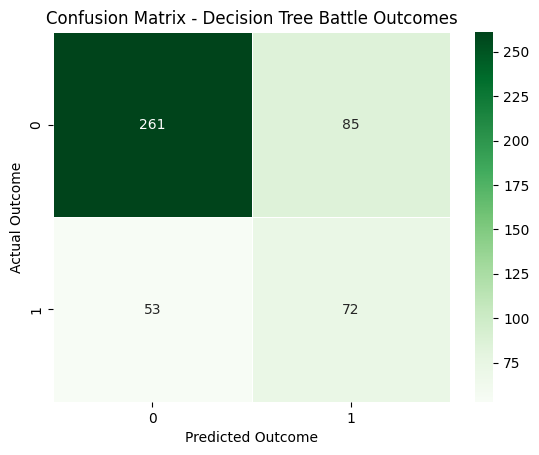

In [65]:
# Step 5: Visualize the Confusion Matrix
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Greens', linewidths=0.5)
plt.title("Confusion Matrix - Decision Tree Battle Outcomes")
plt.xlabel("Predicted Outcome")
plt.ylabel("Actual Outcome")
plt.show()


Tuning the Decision Tree:
To make the model better, you can tune hyperparameters such as:

max_depth: Restricts how deep the tree can go, preventing overfitting.
min_samples_split: Minimum number of samples needed to split an internal node  here its using grid search its time taking process


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Tuned Decision Tree Accuracy: 0.76


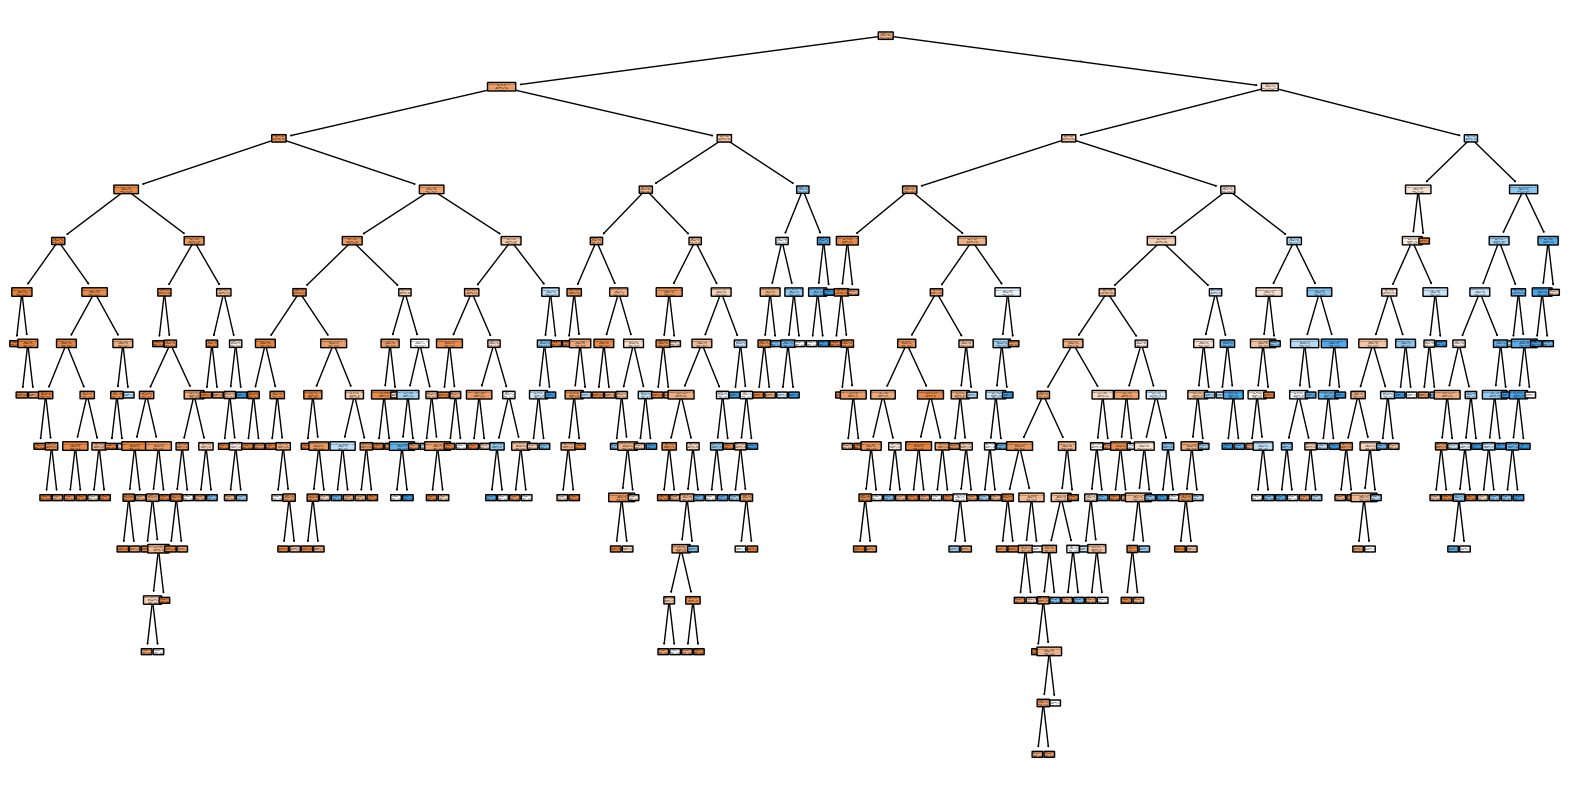

In [66]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to tune the model
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by GridSearch
print("Best Hyperparameters:", grid_search.best_params_)

# Train the model with the best hyperparameters and evaluate
best_dt_model = grid_search.best_estimator_
y_pred_best_dt = best_dt_model.predict(X_test)

# Evaluate tuned model
accuracy_best_dt = accuracy_score(y_test, y_pred_best_dt)
print(f"Tuned Decision Tree Accuracy: {accuracy_best_dt:.2f}")

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Step 1: Plot the Decision Tree
# Use the best model found by GridSearchCV, or the default model if you haven't tuned it yet.
plt.figure(figsize=(20, 10))  # Set the size of the figure to make it large enough to read

# Plot the decision tree
plot_tree(best_dt_model, filled=True, feature_names=X.columns, class_names=['Lose', 'Win'], rounded=True)

# Show the plot
plt.show()



Nodes: These are the boxes that contain the questions.
For example, it might ask: "Is Strength > 7.5?".
Branches: These are the arrows coming out of each node.
Depending on the answer (yes or no), you follow different branches.
Leaves: These are the final nodes that show the outcome.
These are the final decisions, like "Win" or "Lose".
Colors:
Nodes are colored based on how likely they are to lead to an outcome.
For example, if one leaf is very confident that the character wins, it may be a different color than a leaf that predicts a loss.
Example of Interpretation:
Imagine the tree asks:

"Is Speed greater than 5?"
If the answer is Yes, then the tree moves to another question, maybe something like:
"Is Strength greater than 8?".
If Yes, it may go to a leaf that says the outcome is "Win".
If No, it may go to a different branch that checks another feature.
If the answer to the speed question is No, the tree may conclude "Lose".
The tree keeps asking questions, each time narrowing down to get a more specific outcome

next model What is Random Forest?
Imagine you're trying to make a decision, and instead of relying on just one person’s opinion, you ask 100 people and go with the majority opinion. That’s the idea behind a Random Forest.

A Random Forest is a collection of Decision Trees, each of which makes its own prediction. The final decision (prediction) is based on what most of these trees agree on.
It’s called a “forest” because it consists of many Decision Trees (which are like individual opinions), and "random" because each tree is trained on a random subset of the data

In [67]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


Step 2: Train the Random Forest Model
Now, let's create and train a Random Forest model. We will use the training data (X_train and y_train) to teach the model.

In [68]:
# Step 2: Create and Train Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)  # Create a Random Forest with 100 trees
rf_model.fit(X_train, y_train)  # Train (fit) the model using training data


RandomForestClassifier(random_state=42)

In [69]:
# Step 3: Make Predictions on the Test Set
y_pred_rf = rf_model.predict(X_test)  # Predict the outcomes using the trained model


In [70]:
# Step 4: Evaluate the Random Forest Model
accuracy_rf = accuracy_score(y_test, y_pred_rf)  # Calculate the accuracy
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)  # Create the confusion matrix
class_report_rf = classification_report(y_test, y_pred_rf)  # Generate the classification report

# Print the evaluation metrics
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix_rf)
print("\nClassification Report:")
print(class_report_rf)


Random Forest Accuracy: 0.76

Confusion Matrix:
[[305  41]
 [ 70  55]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.85       346
           1       0.57      0.44      0.50       125

    accuracy                           0.76       471
   macro avg       0.69      0.66      0.67       471
weighted avg       0.75      0.76      0.75       471



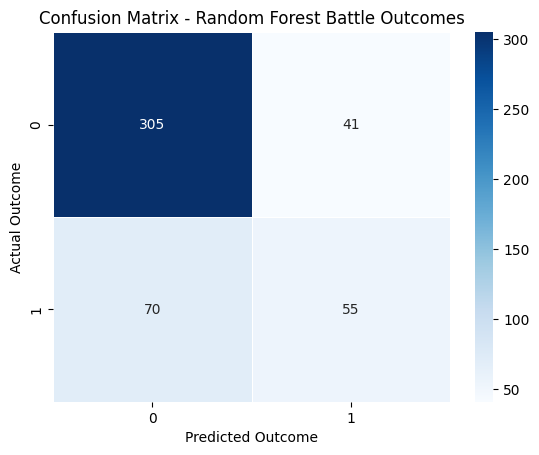

In [71]:
# Step 5: Visualize the Confusion Matrix
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
plt.title("Confusion Matrix - Random Forest Battle Outcomes")
plt.xlabel("Predicted Outcome")
plt.ylabel("Actual Outcome")
plt.show()


After seeing 3 models accuracy is 76% i found that my dataset is imblance now i am blancing my dataset equal win and equal loos and again i will train my model after doing dataset blance

In [72]:
from imblearn.over_sampling import SMOTE

# Step 2: Apply SMOTE to the training data
smote = SMOTE(random_state=42)  # Create a SMOTE object with a fixed random state
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)  # Apply SMOTE to create a balanced dataset

# Check the new class distribution
print("Class distribution after SMOTE:")
print(y_train_smote.value_counts())


Class distribution after SMOTE:
BattleOutcome
0    1349
1    1349
Name: count, dtype: int64


In [73]:
# Step 3: Train Random Forest Classifier on SMOTE Data
rf_model_smote = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model_smote.fit(X_train_smote, y_train_smote)  # Train the model on the balanced dataset


RandomForestClassifier(random_state=42)

Random Forest Accuracy after SMOTE: 0.70

Confusion Matrix after SMOTE:
[[261  85]
 [ 56  69]]

Classification Report after SMOTE:
              precision    recall  f1-score   support

           0       0.82      0.75      0.79       346
           1       0.45      0.55      0.49       125

    accuracy                           0.70       471
   macro avg       0.64      0.65      0.64       471
weighted avg       0.72      0.70      0.71       471



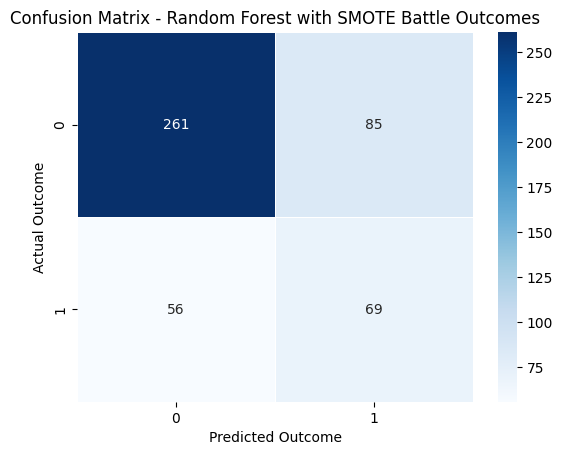

In [74]:
# Step 4: Make Predictions on the Test Set
y_pred_rf_smote = rf_model_smote.predict(X_test)

# Step 5: Evaluate the Random Forest Model after SMOTE
accuracy_rf_smote = accuracy_score(y_test, y_pred_rf_smote)
conf_matrix_rf_smote = confusion_matrix(y_test, y_pred_rf_smote)
class_report_rf_smote = classification_report(y_test, y_pred_rf_smote)

print(f"Random Forest Accuracy after SMOTE: {accuracy_rf_smote:.2f}")
print("\nConfusion Matrix after SMOTE:")
print(conf_matrix_rf_smote)
print("\nClassification Report after SMOTE:")
print(class_report_rf_smote)

# Step 6: Visualize the Confusion Matrix
sns.heatmap(conf_matrix_rf_smote, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
plt.title("Confusion Matrix - Random Forest with SMOTE Battle Outcomes")
plt.xlabel("Predicted Outcome")
plt.ylabel("Actual Outcome")
plt.show()


 Feature Engineering - Improving the Quality of Data
 Feature Engineering is the process of creating new features or transforming existing ones to help the model better understand the data.

Create New Features:
Power Score: Combine features like Strength, Speed, and Intelligence into one feature called Power_Score.
Interaction Features: Create new features that represent the interaction between existing features. For example, Strength * Speed.

In [75]:
# Create new features to enhance model performance
df['Power_Score'] = df['Strength'] + df['Speed'] + df['Intelligence']
df['Speed_to_Strength'] = df['Speed'] / (df['Strength'] + 1e-6)

# Re-define features and target
X = df.drop(columns=['BattleOutcome'])
y = df['BattleOutcome']

# Split the data again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Creating more relevant features helps the model understand the relationship between input and output better. Sometimes, the existing features alone are not informative enough.

Step 2: Use Boosting Algorithms
Boosting algorithms, like XGBoost and Gradient Boosting, tend to perform better than Random Forest in many cases because they correct errors made by previous models.

In [76]:
!pip install xgboost
import xgboost as xgb

# Train XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, n_estimators=500, max_depth=5)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate XGBoost model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.2f}")


XGBoost Accuracy: 0.76


Adding more depth or max depth  GridSearchCV for tuning your XGBoost model,

In [77]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0]
}

# Perform GridSearch to find the best parameters
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, scoring='accuracy')
grid_search_xgb.fit(X_train, y_train)

# Use the best estimator
best_xgb_model = grid_search_xgb.best_estimator_
y_pred_best_xgb = best_xgb_model.predict(X_test)

# Evaluate the best model
accuracy_best_xgb = accuracy_score(y_test, y_pred_best_xgb)
print(f"Best XGBoost Accuracy after Tuning: {accuracy_best_xgb:.2f}")


Best XGBoost Accuracy after Tuning: 0.79


New Model...Naive Bayes is a machine learning algorithm used mainly for classification tasks. It’s a simple, yet powerful tool that makes predictions based on the probability of different classes. It’s called naive because it assumes all features are independent of each other, which is often not true in real life—but it still works well in many scenarios.

Example: Imagine you're trying to classify emails as spam or not spam. You notice spam emails often contain words like "free," "money," "click here," etc. Naive Bayes uses this information to calculate probabilities and make decisions—if an email has a high probability of containing these words, it’s likely spam

Naive Bayes Accuracy: 0.74

Confusion Matrix (Naive Bayes):
[[299  47]
 [ 77  48]]

Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       346
           1       0.51      0.38      0.44       125

    accuracy                           0.74       471
   macro avg       0.65      0.62      0.63       471
weighted avg       0.72      0.74      0.72       471



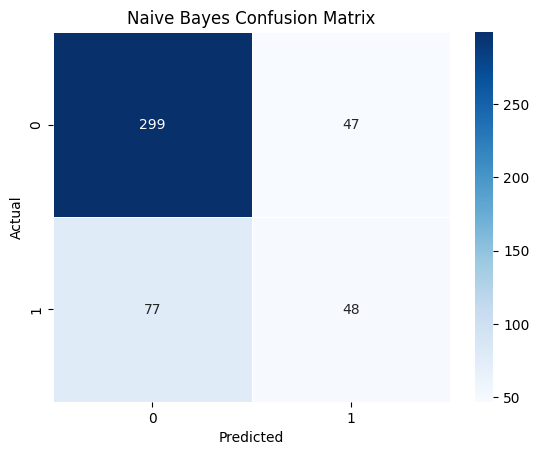

In [78]:
# Import the necessary libraries
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Train Naive Bayes Model
nb_model = MultinomialNB()  # Initialize the Multinomial Naive Bayes model
nb_model.fit(X_train, y_train)  # Train the model on the training data

# Step 2: Make Predictions
y_pred_nb = nb_model.predict(X_test)  # Make predictions on the test data

# Step 3: Evaluate the Naive Bayes Model
# Accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb:.2f}")

# Confusion Matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print("\nConfusion Matrix (Naive Bayes):")
print(conf_matrix_nb)

# Classification Report
class_report_nb = classification_report(y_test, y_pred_nb)
print("\nClassification Report (Naive Bayes):")
print(class_report_nb)

# Step 4: Visualize the Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Next model SVM tries to draw a line (or a hyperplane) between two classes to separate them as cleanly as possible. The goal is to find the best possible line that has the widest margin between the two classes.Plotting the Fruits:

Imagine you plot each fruit on a graph. You might use characteristics like weight and color as your axes.
Apples are heavier and have a certain color, while oranges are lighter with a different shade of color. You plot them on this graph according to these characteristics.
Drawing the Line (Hyperplane):

SVM finds the best line (in two dimensions) or hyperplane (in higher dimensions) that separates the two fruits.
The idea is to find a line that not only separates them but does so with the widest margin possible—this means the line is as far away as possible from both apples and oranges.
Support Vectors:

The fruits that are closest to the line are called support vectors. These are the critical data points that determine where the line should be placed.
If the position of these support vectors changes, the line might move, so these points are what "support" the decision boundary.

SVM Accuracy: 0.79

Confusion Matrix (SVM):
[[304  42]
 [ 57  68]]

Classification Report (SVM):
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       346
           1       0.62      0.54      0.58       125

    accuracy                           0.79       471
   macro avg       0.73      0.71      0.72       471
weighted avg       0.78      0.79      0.79       471



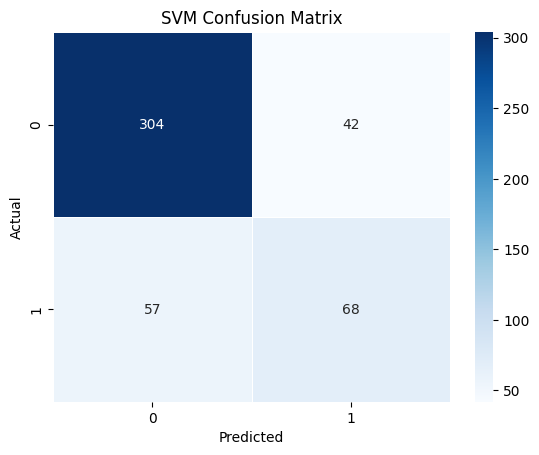

In [79]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Initialize the SVM model
# We'll use a linear kernel here, but SVM can use other kernels too, like 'rbf', 'poly', etc.
svm_model = SVC(kernel='linear', random_state=42)

# Step 2: Train the SVM model
svm_model.fit(X_train, y_train)

# Step 3: Make Predictions
y_pred_svm = svm_model.predict(X_test)

# Step 4: Evaluate the Model
# Accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.2f}")

# Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("\nConfusion Matrix (SVM):")
print(conf_matrix_svm)

# Classification Report
class_report_svm = classification_report(y_test, y_pred_svm)
print("\nClassification Report (SVM):")
print(class_report_svm)

# Step 5: Visualize the Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
